In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [32]:
N = 50 # Number of colocation points
std = 0.1 # Standard deviation of the noise added to the data

In [33]:
# Inicializando listas para armazenar os erros acumulados
erros_abs_acumulados = []

# Loop para carregar os arquivos e calcular os erros
for i in range(1, 101):
    caminho = f"/home/gubio/CODESPACE/Pinn-inverse-for-opem-quantum-system/No fields/data/parametro_nofields_N{N}_seed{i}_std{std}.csv"
    df = pd.read_csv(caminho, index_col=0)
    
    # Calculando erros
    valor_real = df['treino'].str.strip('[]').astype(float)
    valor_previsto = df['previsto'].str.strip('[]').astype(float)
    
    erro_abs = (valor_real - valor_previsto)**2# Absolute Error
    
    
    # Acumulando erros
    erros_abs_acumulados.append(erro_abs)

# Calculando a média, desvio padrão, máximo e mínimo dos erros
erros_abs_concat = pd.concat(erros_abs_acumulados, axis=1)




This is a statistical description for each seed.

In [34]:
(erros_abs_concat).describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,1.300000e+01,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,1.300000e+01,13.000000,13.000000
mean,0.010978,0.006426,1.307983,0.007659,0.007656,0.014708,0.002006,0.001798,0.004566,1.742711e-02,...,0.024079,0.008728,0.017707,0.003138,0.007168,0.005405,0.004175,1.831504e-03,0.034167,0.026343
std,0.014021,0.009252,1.915271,0.011426,0.009208,0.017089,0.002060,0.002078,0.004466,2.240453e-02,...,0.026655,0.012221,0.030972,0.005534,0.007198,0.006948,0.004503,3.288278e-03,0.048148,0.029922
min,0.000865,0.000022,0.000136,0.000002,0.000160,0.000068,0.000060,0.000012,0.000362,6.361003e-07,...,0.000251,0.000426,0.000023,0.000001,0.000017,0.000072,0.000007,8.726031e-07,0.000136,0.000103
25%,0.001514,0.000439,0.039616,0.000810,0.001160,0.003942,0.000537,0.000132,0.001265,1.715018e-04,...,0.003369,0.000794,0.000035,0.000143,0.002052,0.000260,0.000321,1.878761e-04,0.005629,0.003093
50%,0.003508,0.002195,0.344046,0.001285,0.003742,0.010316,0.000786,0.001303,0.003972,5.118438e-03,...,0.017256,0.003231,0.001898,0.001462,0.003040,0.003553,0.001724,2.894926e-04,0.017204,0.015835
75%,0.014543,0.007561,2.023900,0.011263,0.007329,0.015656,0.002843,0.001855,0.004940,2.861259e-02,...,0.036061,0.006779,0.016903,0.003810,0.013993,0.006826,0.008939,1.924454e-03,0.031732,0.052087
max,0.046201,0.027808,5.662263,0.032279,0.025118,0.064437,0.006725,0.006166,0.015112,7.281211e-02,...,0.080006,0.038852,0.110368,0.020726,0.020796,0.024986,0.011261,1.178652e-02,0.153468,0.081753


This is a statistical description for each parameter

In [35]:
names = [r'$\gamma_1$', r'$\gamma_2$', r'$\gamma_3$', r'$\gamma_4$',
         r'$JXX$', r'$JXY$', r'$JXZ$', r'$JYX$', r'$JYY$', r'$JYZ$',
         r'$JZX$', r'$JZY$', r'$JZZ$']

# renomear as linhas no original (19 parâmetros)
erros_abs_concat.index = names

# se quiser o transposto com colunas renomeadas:
erros_abs_concat_T = erros_abs_concat.T.copy()
erros_abs_concat_T.columns = names

### all

/tmp/ipykernel_18823/390755269.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fmt_data = data1.applymap(lambda x: f"{x:.3e}")  # notação científica com 3 casas


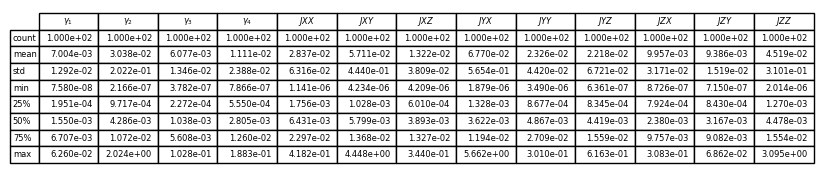

In [36]:
fig, ax = plt.subplots(figsize=(10,2))

data1 = ((erros_abs_concat.T)).describe()
fmt_data = data1.applymap(lambda x: f"{x:.3e}")  # notação científica com 3 casas
tbl = ax.table(
    cellText=fmt_data.values,
    colLabels=data1.columns,
    rowLabels=data1.index,
    loc="best"
)

ax.axis("off")
ax.axis("tight")

plt.savefig(f"data_mse_all_Nc{N}_std{std}.png", dpi=300, bbox_inches="tight")